In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utilities.base import BaseData

In [2]:
df = BaseData().get_filled_df()

In [3]:
df.head(1)

,date,type,category_id,category_title,site_title,price_old,site_unit,site_link,site_code,miss,price_new,nsprice_f
id,,,,,,,,,,,,
0,2019-02-01,food,10,"Молоко питьевое цельное пастеризованное 2,5-3,...","Молоко питьевое цельное пастеризованное 2,5-3,...",-1.0,л,109549,gks,0,55.17,55.17


# Было VS Стало - количество ценовых котировок по категориям

In [4]:
cond_instock_before = (df.date=='2019-06-01')&(df.miss==0)
cond_instock_after = (df.date==df.date.sort_values().iloc[-1])&(df.miss==0)
links_srs_before = df[cond_instock_before].groupby('category_id')['site_link'].nunique()
links_srs_after = df[cond_instock_after].groupby('category_id')['site_link'].nunique()

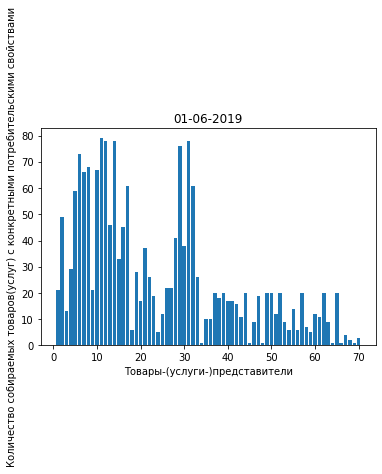

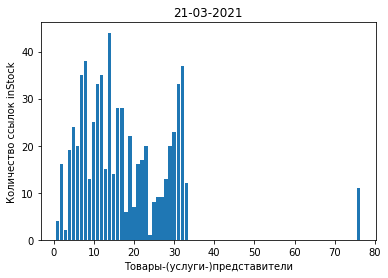

In [5]:

# plt.bar(links_srs.index, links_srs.values);

plt.bar(links_srs_before.index, links_srs_before.values, align='center')
plt.title('01-06-2019')
plt.xlabel('Товары-(услуги-)представители')
plt.ylabel('Количество собираемых товаров(услуг) с конкретными потребительскими свойствами')
plt.show()

plt.bar(links_srs_after.index, links_srs_after.values, align='center')
plt.xlabel('Товары-(услуги-)представители')
plt.ylabel('Количество ссылок inStock')
plt.title('21-03-2021')
plt.show();


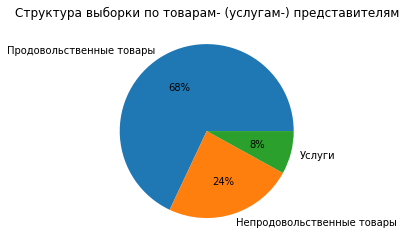

In [6]:
type_shares = df[cond_instock_after].groupby('type')['category_id'].nunique()
plt.pie(type_shares,autopct='%1.0f%%',
labels=['Продовольственные товары', 'Непродовольственные товары', 'Услуги']);
plt.title('Структура выборки по товарам- (услугам-) представителям');

In [77]:
example_df = df[['date','site_title', 'category_id', 'site_code', 'site_unit', 'price_new', 'price_old']].drop_duplicates('site_title').iloc[-10:-1, :]

In [79]:
example_df.to_excel("~/Desktop/example_df.xlsx")